# How Data Will Make You Drink Wine Differently
### by Stephanie Irvine


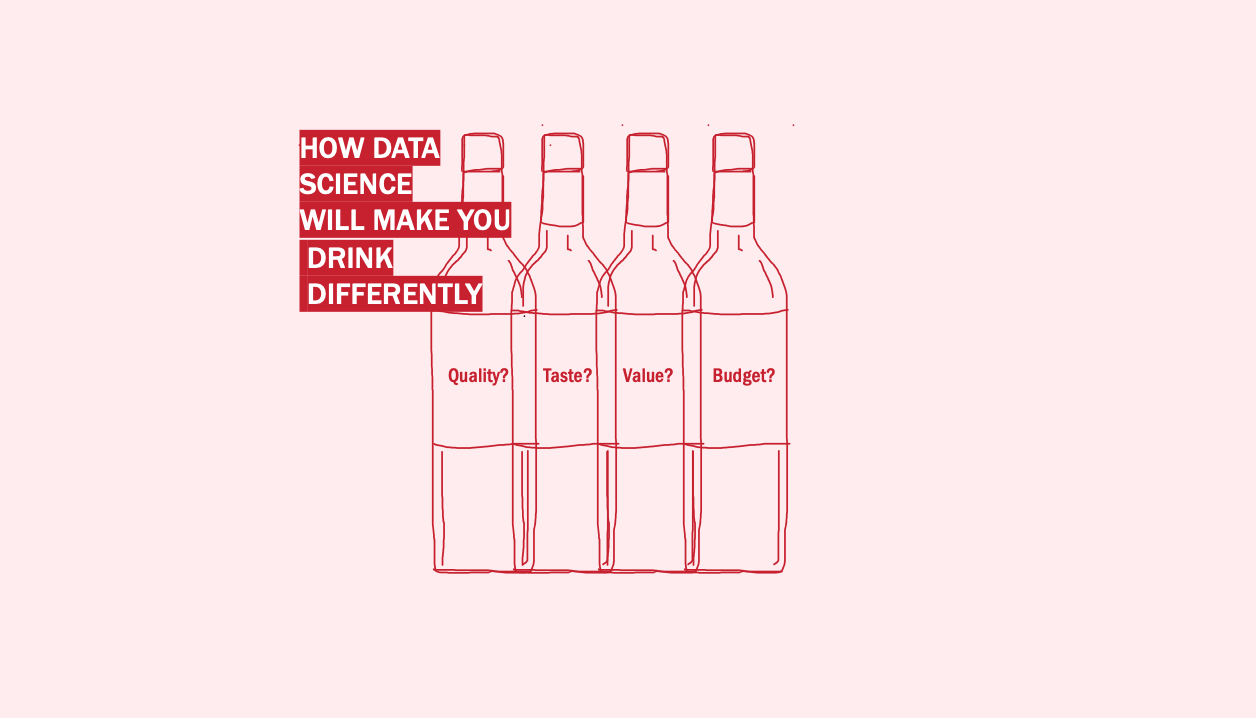



## Table of Contents
- [Introduction](#intro)
- [Exploratory Data Analysis](#eda)
- [Conclusions](#conclusions)



<a id='intro'></a>
## Introduction

For this project I decided to analyse the Wine Rating dataset found on Kaggle: https://www.kaggle.com/zynicide/wine-reviews using the CRISP-DM Process of:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## Business Understanding

I am a wine lover, although not a wine expert so I was excited to gain some more insight into how you can get the best wine for the best value. Sometimes I walk into the shop and I am struck by the anxiety of how to choose the best bottle of wine for me. It depends on the situation, is this wine just for a quiet night in or is it a gift? Maybe I'm trying to make a good impression with the wine I bring, or maybe I'm in an uncomfortable restaurant situation with the in-laws! To help consumers like me find the best bottle of wine for their price bracket the below questions were posed:

- Where does the best wine come from?
- Is price related to quality?
- Are certain varieties of wine higher quality?
- What is the best wine in each price bracket? 
- What words are most used when describing wine?

<a id='eda'></a>
## Exploratory Data Analysis

### Prepare Data

To get started, let's import our libraries.

In [1]:
# import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# read in the dataset
df = pd.read_csv("winemag-data-130k-v2.csv")

In [3]:
# check reading in worked and look at the rows in the dataset 
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### Assessing the Data

From the above it is clear we have 129971 rows and 14 columns in the dataset. 

`df` columns:
 - **unnamed:** This is just an index column which can be removed
 - **country:** This is the country where the wine was made
 - **description:** This is a description of the wine
 - **designation:** This is the vineyard within the winery where the grapes that made the wine are from
 - **points:** This is the number of points the wine was scored in the review
 - **price:** This is the price of the bottle of wine
 - **province:** This is the province or state where the wine was made 
 - **region_1:** This is the region where the wine was made
 - **region_2:** Sometimes there are more specific regions specified within a wine growing area. It looks like we can remove this
 - **taster_name:** This is the name of the reviewer
 - **taster_twitter_handle:** This is the Twitter account that made the review
 - **title:** This is the name of the wine being reviewed. Interestingly the year is included here.
 - **variety:** This is the type of grapes used to make the wine
 - **winery:** This is the winery where the wine was made

In [4]:
df.sample(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
5758,5758,US,From a steep hillside vineyard that is estate ...,Sexton Hill Vineyard,92,42.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Balletto 2013 Sexton Hill Vineyard Pinot Noir ...,Pinot Noir,Balletto
47512,47512,Germany,"Dark, almost russet in color, this is an eiswe...",Herrenberg Eiswein 82,93,316.0,Mosel,NaN,NaN,Joe Czerwinski,@JoeCz,Maximin Grünhäuser 2009 Herrenberg Eiswein 82 ...,Riesling,Maximin Grünhäuser
23470,23470,France,"Even at four years of age, this shows great pu...",NaN,91,34.0,Rhône Valley,Gigondas,NaN,Joe Czerwinski,@JoeCz,E. Guigal 2009 Gigondas,Rhône-style Red Blend,E. Guigal
2814,2814,US,"This blend of Merlot, Cabernet Sauvignon, Cabe...",La Vie en Rouge,86,14.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Kennedy Shah 2012 La Vie en Rouge Red (Columbi...,Red Blend,Kennedy Shah
18832,18832,France,A fresh and white-fruited wine. It has the cri...,Signature,87,15.0,Provence,Côtes de Provence,NaN,Roger Voss,@vossroger,Domaine de la Sanglière 2010 Signature White (...,White Blend,Domaine de la Sanglière
105958,105958,Italy,"Bright, intense and compelling, this Syrah has...",Tenuta,88,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Tenuta Rapitalà 2011 Tenuta Syrah (Sicilia),Syrah,Tenuta Rapitalà
99460,99460,France,Worldwide still the biggest-selling Champagne ...,Impérial Brut,89,41.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Moët & Chandon NV Impérial Brut (Champagne),Champagne Blend,Moët & Chandon
38421,38421,Portugal,Tinta Roriz is one of the grapes that is very ...,NaN,93,32.0,Dão,NaN,NaN,Roger Voss,@vossroger,Quinta de Lemos 2009 Tinta Roriz (Dão),Tinta Roriz,Quinta de Lemos
58062,58062,New Zealand,This wine boasts subtle black cherries and plu...,NaN,91,39.0,Marlborough,NaN,NaN,Joe Czerwinski,@JoeCz,Cloudy Bay 2013 Pinot Noir (Marlborough),Pinot Noir,Cloudy Bay
53502,53502,France,The aromas of this robust rosé scream “Pinot N...,Dom Pérignon Rosé,90,290.0,Champagne,Champagne,NaN,NaN,NaN,Moët & Chandon 1990 Dom Pérignon Rosé (Champa...,Champagne Blend,Moët & Chandon


In [5]:
# info about datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


There are a several columns with some missing data. It looks like we could drop region_2, and taster_twitter_handle. I'll need to look into designation, I'm not sure if I'll need this column.

In [6]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


Here we see the range of points given to a bottle of wine. The minimum is 80 and the max is 100. After a quick google this seems to be a reasonable scale. Using the link here:https://www.wine-searcher.com/critics-17-wine+enthusiast I found that the Wine Enthusiast rates as below:

 - 98–100 – Classic
 - 94–97 – Superb
 - 90–93 – Excellent
 - 87–89 – Very good
 - 83–86 – Good
 - 80–82 – Acceptable

We also see that the minimum price for a bottle of wine is $4. I know the price is in dollars from checking out the Wine Enthuasiast blog where this data was scraped from, the link is here: https://www.winemag.com/?s=&drink_type=wine

In [7]:
# check out the number of reviews per wine country
df.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Here we can see that the majority of wine reviewed is from the US, France, Italy, Spain and Portugal which isn't too surprising as these countries are known for their wine production.

In [8]:
df.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [9]:
df.variety.value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Pinot Blanc-Pinot Noir          1
Maria Gomes-Bical               1
Catalanesca                     1
Garnacha-Cabernet               1
Merlot-Petite Verdot            1
Name: variety, Length: 707, dtype: int64

When assessing the dataset, it looks relatively clean with only a few issues i'd like to fix before moving on to analysing, modelling and visualising. I've made a note of the issues i'll deal with during cleaning:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [11]:
# check for duplicate rows
sum(df.duplicated())

0

##### Quality

 - 'Unnamed: 0', 'region_2', ''taster_name','taster_twitter_handle', 'designation' columns don't add anything useful to my analysis so could be dropped
 - Missing values in 'country', 'price', 'province', 'variety', 'region_1'


##### Tidiness

 - Title column has the year in it so could be made into a separate column

### Cleaning the Data

The first step of the cleaning process is to make a copy of the DataFrame. Then for each of the issues identified in the Assess stage we will go through the process of defining the issue and how to fix it, coding a fix, test that it worked.

In [12]:
# make a copy
df1 = df.copy()

#### Quality

 **'Unnamed: 0', 'region_2', ''taster_name','taster_twitter_handle', 'designation' columns don't add anything useful to my analysis so could be dropped**

###### Define


Can go ahead and drop the columns 'Unnamed: 0','region_2' and 'taster_twitter_handle' as we won't need these 

###### Code

In [13]:
# drop the missing columns
df1 = df1.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1)

##### Test

In [14]:
df1

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


 **Missing values in 'country', 'price', 'province', 'variety', 'region_1'**


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   title        129971 non-null  object 
 7   variety      129970 non-null  object 
 8   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [16]:
# proportion of price non null
prop_price = df1.price.count()/df1.shape[0]
prop_price

0.9307845596325334

In [17]:
# proportion of region_1 non null 
prop_reg1 = df1.region_1.count()/df1.shape[0]
prop_reg1

0.8365250709773718

In [18]:
# number of missing rows for region_1
missing_reg1 = 129971 - 108724 
missing_reg1

21247

If we remove rows with null values in the price column this leaves 93% of the rows. I'm comfortable removing these in such a big dataset. Price is the column with the most missing values with exception of Region_1, this has over 20,000 missing values so let's leave this alone for now.

###### Define

Can remove the rows missing country, price, variety and province as these are so few comparatively. 

##### Code

In [19]:
# drop only the rows with missing values in columns country, price, variety, province
df1 = df1.dropna(how='any', subset=['country', 'price', 'variety', 'province'])

##### Test

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   region_1     101400 non-null  object 
 6   title        120915 non-null  object 
 7   variety      120915 non-null  object 
 8   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ MB


Happy to leave this as it is right now, with no nulls except in the region_1 column.

##### Tidiness

##### Define:
**Extract the year from the title**

##### Code

In [21]:
df1['year'] = df1['title'].str.extract('(\d+)')

C:\Users\steph\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##### Test

In [22]:
df1

,country,description,points,price,province,region_1,title,variety,winery,year
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


### Exploratory Data Analysis: Analyse and Visualise

### 1. Where does the best wine come from?

First let's look at the distribution of the points given to the wines in the dataset as this is a feature of interest in my analysis.

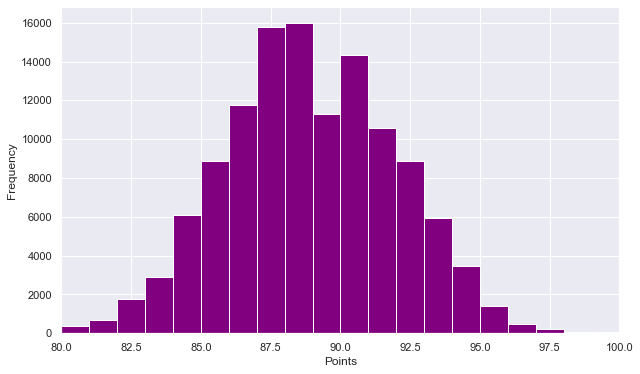

In [23]:
# plot the distribution of points
plt.figure(figsize=(10,6))
bin_edges = np.arange (80, df1['points'].max()+1, 1)
plt.hist(data = df1, x = 'points', bins = bin_edges, color = 'purple')
plt.xlim(80,100)
plt.xlabel('Points')
plt.ylabel('Frequency');

As shown from the above plot, there is approximately a normal distribution of points ranging from 80-100. 

Let's see which countries are in the top 10 countries of produce the most wine, not necessarily the best.

In [24]:
# top 10 wine producing countries
country_most = df1.country.value_counts()[:10]

In [25]:
country_most

US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64

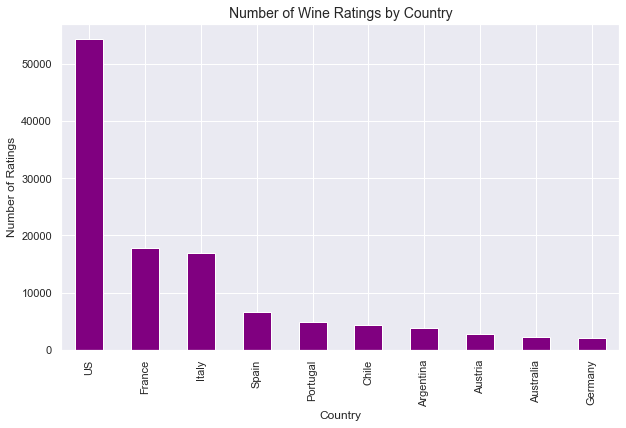

In [26]:
# plotting the countries with the most wine produced according to the dataset
plt.figure(figsize=(10,6))
country_most.plot(kind='bar', color = 'purple')
plt.title('Number of Wine Ratings by Country', fontsize = 14)
plt.xlabel('Country')
plt.ylabel('Number of Ratings');

From the graph above we can see that the top 10 countries who produce the most wine are: US, France, Italy, Spain, Portugal, Chile, Argentina, Austria, Australia, and Germany. This is similar to what I would have guessed so no surprises here. Ok, now let's look at how many countries produce wine of the best quality according to our ratings.

In [27]:
# group numerical variables by country 
df2 = df1.groupby('country').agg('mean')

In [28]:
# create df with 10 countries with most average points
df3 = df2.sort_values(by='points', ascending=False)[:10]
df3

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598
Hungary,89.165517,40.648276
China,89.000000,18.000000
France,88.734867,41.139120
Luxembourg,88.666667,23.333333


In [29]:
# convert countries to series for plotting
y_vals = df3.index.to_series()

In [30]:
# get points as the x-variable
x_vals = df3['points']
x_vals

country
England       91.550725
India         90.222222
Austria       90.190782
Germany       89.836321
Canada        89.377953
Hungary       89.165517
China         89.000000
France        88.734867
Luxembourg    88.666667
Italy         88.618186
Name: points, dtype: float64

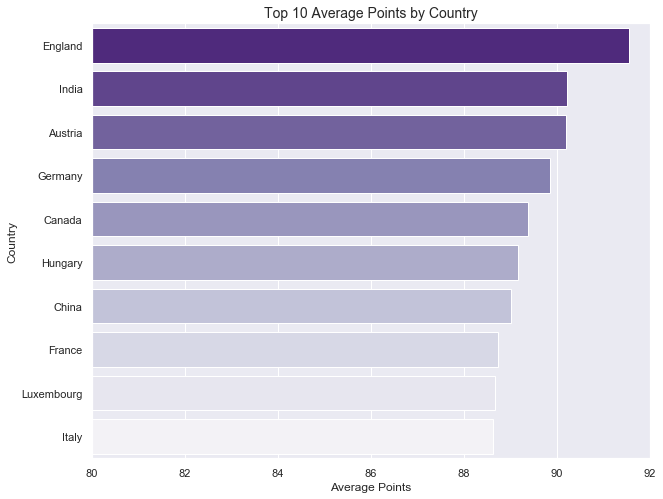

In [72]:
plt.figure(figsize=(10,8))
plt.xlim(80, 92)
sns.barplot(x=x_vals, y=y_vals, palette='Purples_r')
plt.title('Top 10 Average Points by Country', fontsize = 14)
plt.xlabel('Average Points')
plt.ylabel('Country');

Somewhat surprisingly, when looking at the highest average points per country it was England that produced the best quality wine. This is perhaps because there are fewer wines from England in the dataset and they have scored high therefore increasing the mean. It is worth investigating this further, let's look at those with scores over 95, i.e. the superb wines according to the Wine Enthusiast Rating system. 

In [32]:
df1.points.describe()

count    120915.000000
mean         88.421726
std           3.044954
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [33]:
high_scorers = df1[df1['points']>=95]
high_scorers

,country,description,points,price,province,region_1,title,variety,winery,year
345,Australia,This wine contains some material over 100 year...,100,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,NaN
346,Australia,"This deep brown wine smells like a damp, mossy...",98,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards,NaN
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",97,775.0,Rheingau,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,2014
348,Australia,Deep mahogany. Dried fig and black tea on the ...,97,100.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards,NaN
349,Australia,"RunRig is always complex, and the 2012 doesn't...",97,225.0,South Australia,Barossa,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck,2012
...,...,...,...,...,...,...,...,...,...,...
128270,US,"Monumentally detailed, this 100% Cabernet Sauv...",97,65.0,California,St. Helena,Redmon 2006 Cabernet Sauvignon (St. Helena),Cabernet Sauvignon,Redmon,2006
128271,Spain,"Concentrated to the hilt, with molten black fr...",96,82.0,Northern Spain,Rioja,Remírez de Ganuza 2005 Old Vines Unfiltered (...,Tempranillo Blend,Remírez de Ganuza,2005
128682,US,Easy to like a lot now for its terrifically ri...,95,38.0,California,Russian River Valley,Dutton Estate 2007 Dutton Ranch Karmen Isabell...,Pinot Noir,Dutton Estate,2007
128683,US,"Big, powerful, soft, rich and ageable. In othe...",95,90.0,California,Carneros,Etude 2006 Heirloom Estate Grown Pinot Noir (C...,Pinot Noir,Etude,2006


In [34]:
# number of wines from each country scoring the highest ratings of 95-100 points
high_scorers.country.value_counts()

US              991
France          509
Italy           326
Austria         103
Portugal         96
Germany          62
Spain            51
Australia        47
Argentina        11
Hungary           5
South Africa      3
England           3
Chile             2
New Zealand       2
Name: country, dtype: int64

In [35]:
# number of wines from each country in the dataset
df1.country.value_counts()

US                        54265
France                    17776
Italy                     16914
Spain                      6573
Portugal                   4875
Chile                      4415
Argentina                  3756
Austria                    2799
Australia                  2294
Germany                    2120
New Zealand                1378
South Africa               1293
Israel                      489
Greece                      461
Canada                      254
Hungary                     145
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

As shown from above, the countries which achieved a rating of 95-100 points for their wines differ from our plot of the highest scorers based on their means. A barplot will allow us to see the max, min and mean scored by each country in the dataset which should paint a clearer picture of which countries score the highest points. Since this dataset contains more US wines it is likely that there will be a broad range of wines from the country whereas England which received the best average score has fewer wines in the dataset which is an unfair comparison.

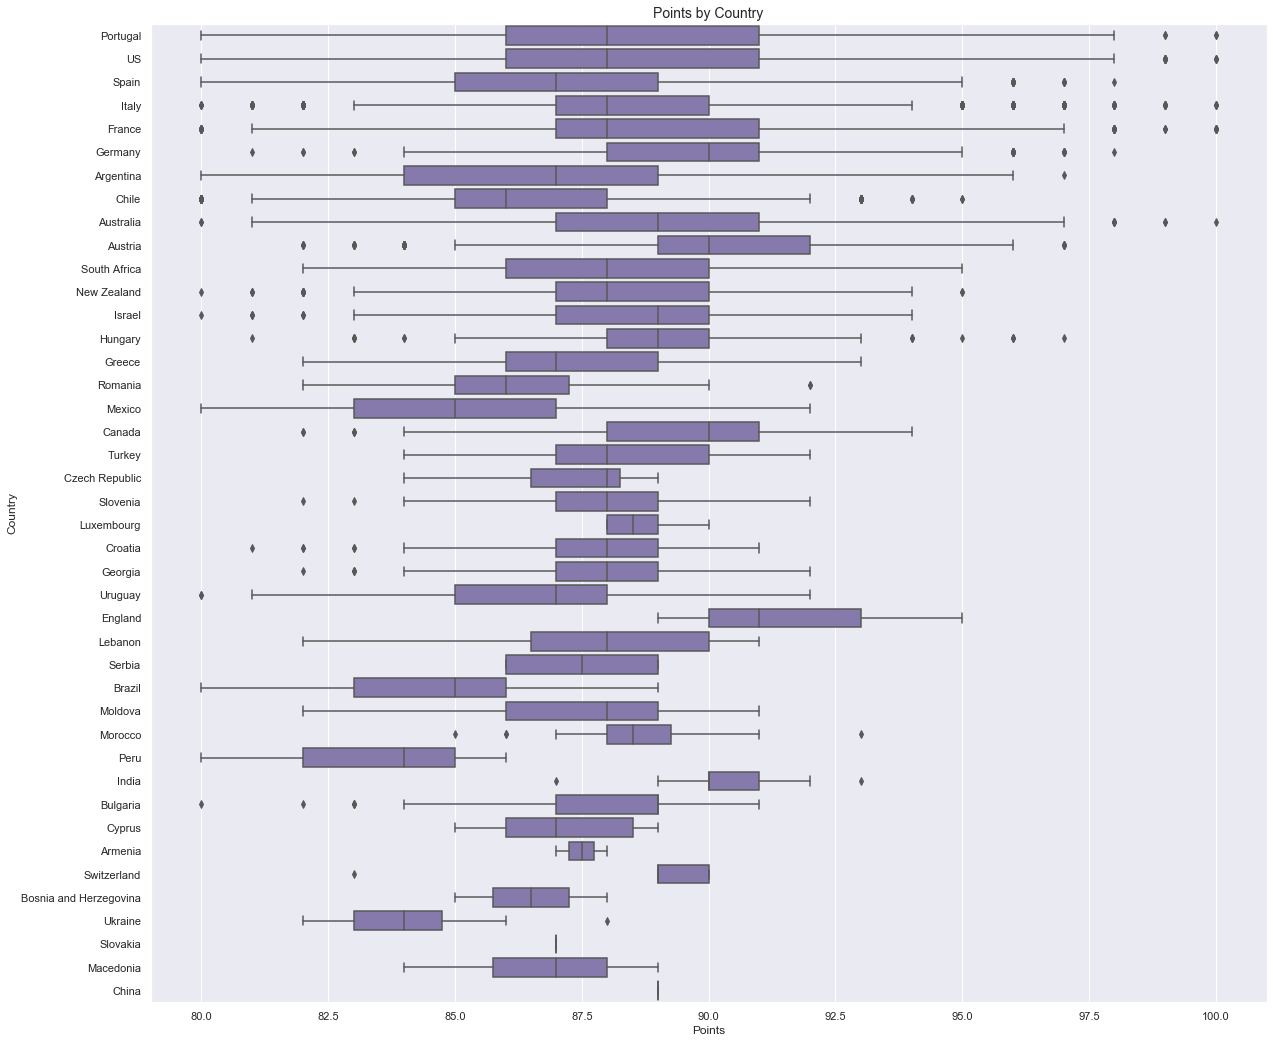

In [77]:
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df1, x = 'points', y = 'country', color = base_color)
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

As shown from the boxplot above it is clear that although wines from England had the highest points on average, wines from Portugal, the US, Italy, France, and Australia made wines which received a perfect score of 100. There are many more wines from these countries in the dataset therefore there is a wider range of scores they received.

In [37]:
# count of province
wine_prov = df1.province.value_counts()[:10]

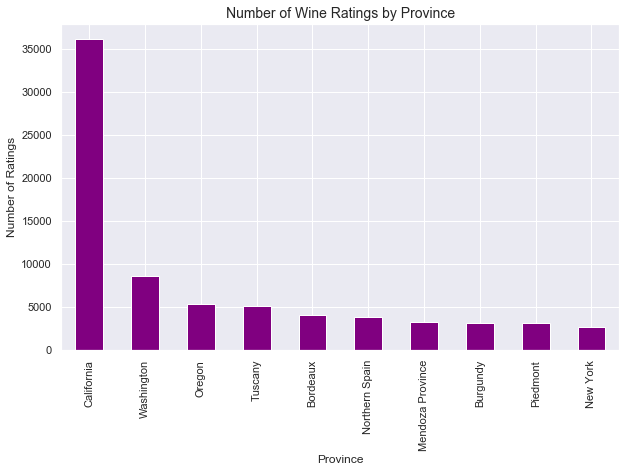

In [38]:
plt.figure(figsize=(10,6))
wine_prov.plot(kind='bar', color = 'purple')
plt.title('Number of Wine Ratings by Province', fontsize = 14)
plt.xlabel('Province')
plt.ylabel('Number of Ratings');

Unsurprisingly, the most popular province in this dataset is California. The most reviewed country was the US, so it was predictable that California would be the province to have the most wines reviewed.

Now that we've seen the different distribution of quality of wine from each country, let's investigate the price of wine from different countries. 

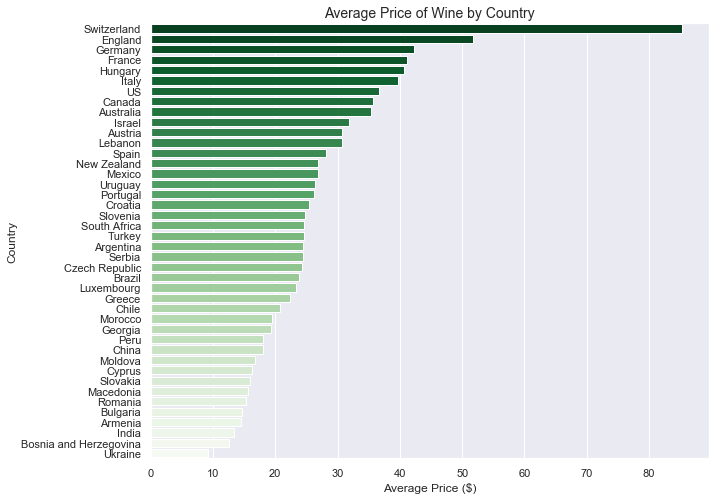

In [39]:
df4 = df1.groupby('country').agg('mean')
df5 = df4.sort_values(by='price', ascending=False)
y_val = df5.index.to_series()
x_val = df5['price']

plt.figure(figsize=(10,8))
sns.barplot(x=x_val, y=y_val, palette='Greens_r')
plt.title('Average Price of Wine by Country', fontsize = 14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country');

Switzerland produces the most costly wine, with the average price being over $80 for a bottle. Wine from Ukraine is on the other end of the spectrum with the average price being under just 10 dollars.

### 2. Is Price Related to Quality of Wine?

First I will look at the distribution of wine prices.

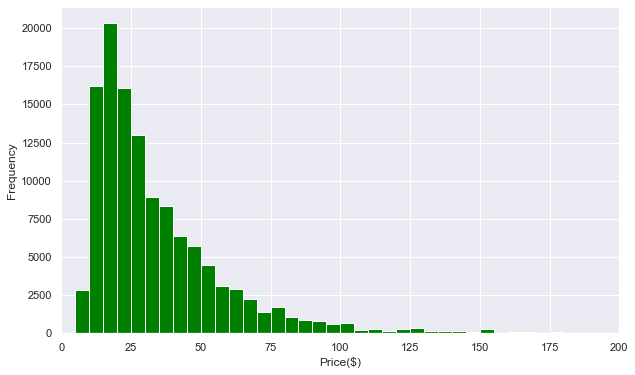

In [40]:
# plotting price distribution
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, df1['price'].max()+5, 5)
plt.hist(data = df1, x = 'price', bins = bin_edges, color = 'green')
plt.xlim(0,200) # cut the x-axis at 200
plt.xlabel('Price($)')
plt.ylabel('Frequency');

As shown from the graph above, price data is highly skewed to the right. To gain a better understanding of the distribution, I will apply a logarithmic transformation.

In [41]:
df1['price'].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [42]:
np.log10(df1['price'].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

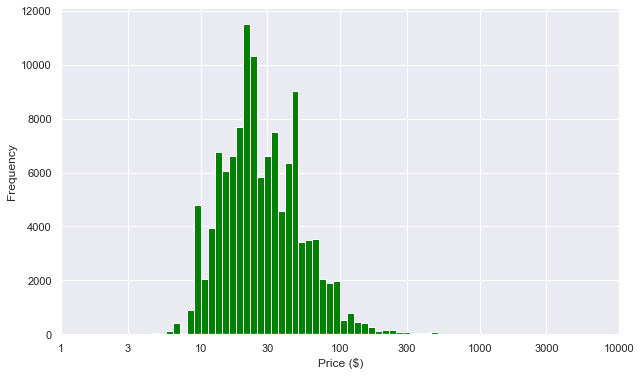

In [43]:
# plotting price distribution on a log scale
plt.figure(figsize=(10,6))
bin_edges = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data = df1, x = 'price', bins=bin_edges, color = 'green')
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

The graph above highlights an approximately log-normal distribution. There is a jump around the 10 dollar mark, and a clear peak at just over 20 dollars. There is another peak at wines priced just over $50. 

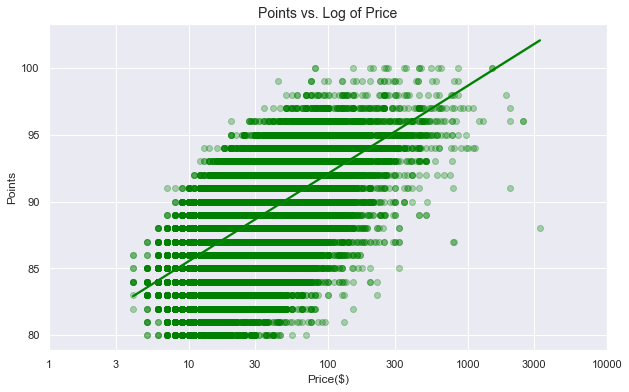

In [44]:
# plotting a scatter plot of relationship between points and price with a log transformation on the price axis
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=df1, color = 'green', logx = True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Log of Price", fontsize=14)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
plt.xlabel("Price($)")
plt.ylabel("Points");

As shown from the scatterplot, there is a positive relationship between points and price, with more expensive wines tending to receive better ratings.

In [85]:
# the lowest priced wine
df1.loc[df1['price'].idxmin()]

country                                                    Spain
description    Berry and cherry aromas are surprisingly sturd...
points                                                        85
price                                                          4
province                                           Central Spain
region_1                           Vino de la Tierra de Castilla
title          Felix Solis 2013 Flirty Bird Syrah (Vino de la...
variety                                                    Syrah
winery                                               Felix Solis
year                                                        2013
Name: 1987, dtype: object

In [46]:
# the highest priced wine
df1.loc[df1['price'].idxmax()]

country                                                   France
description    This ripe wine shows plenty of blackberry frui...
points                                                        88
price                                                       3300
province                                                Bordeaux
region_1                                                   Médoc
title                       Château les Ormes Sorbet 2013  Médoc
variety                                 Bordeaux-style Red Blend
winery                                  Château les Ormes Sorbet
year                                                        2013
Name: 80290, dtype: object

In [114]:
pd.options.display.max_colwidth = 500
df1[df1['price']==df['price'].min()][:1]

,country,description,points,price,province,region_1,title,variety,winery,year
1987,Spain,"Berry and cherry aromas are surprisingly sturdy and clean. Freshness is maintained on the palate, which is honest enough to offer modest tannic bite. Lightly spiced plum and raspberry flavors change little on an easy finish.",85,4.0,Central Spain,Vino de la Tierra de Castilla,Felix Solis 2013 Flirty Bird Syrah (Vino de la Tierra de Castilla),Syrah,Felix Solis,2013


In [110]:
df1[df1['price']==df['price'].max()]

,country,description,points,price,province,region_1,title,variety,winery,year
80290,France,"This ripe wine shows plenty of blackberry fruits balanced well with some dry tannins. It is fresh, juicy with plenty of acidity, For a light vintage, it's perfumed, full of fresh flavors and will be ready to drink from 2017.",88,3300.0,Bordeaux,Médoc,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,2013


### 3. Are certain varieties of Wine of Better Quality on Average?

Let's now compare the top 20 wine types and see how they score.

In [47]:
# top 20 wines by count
df1.variety.value_counts()[:20]

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: variety, dtype: int64

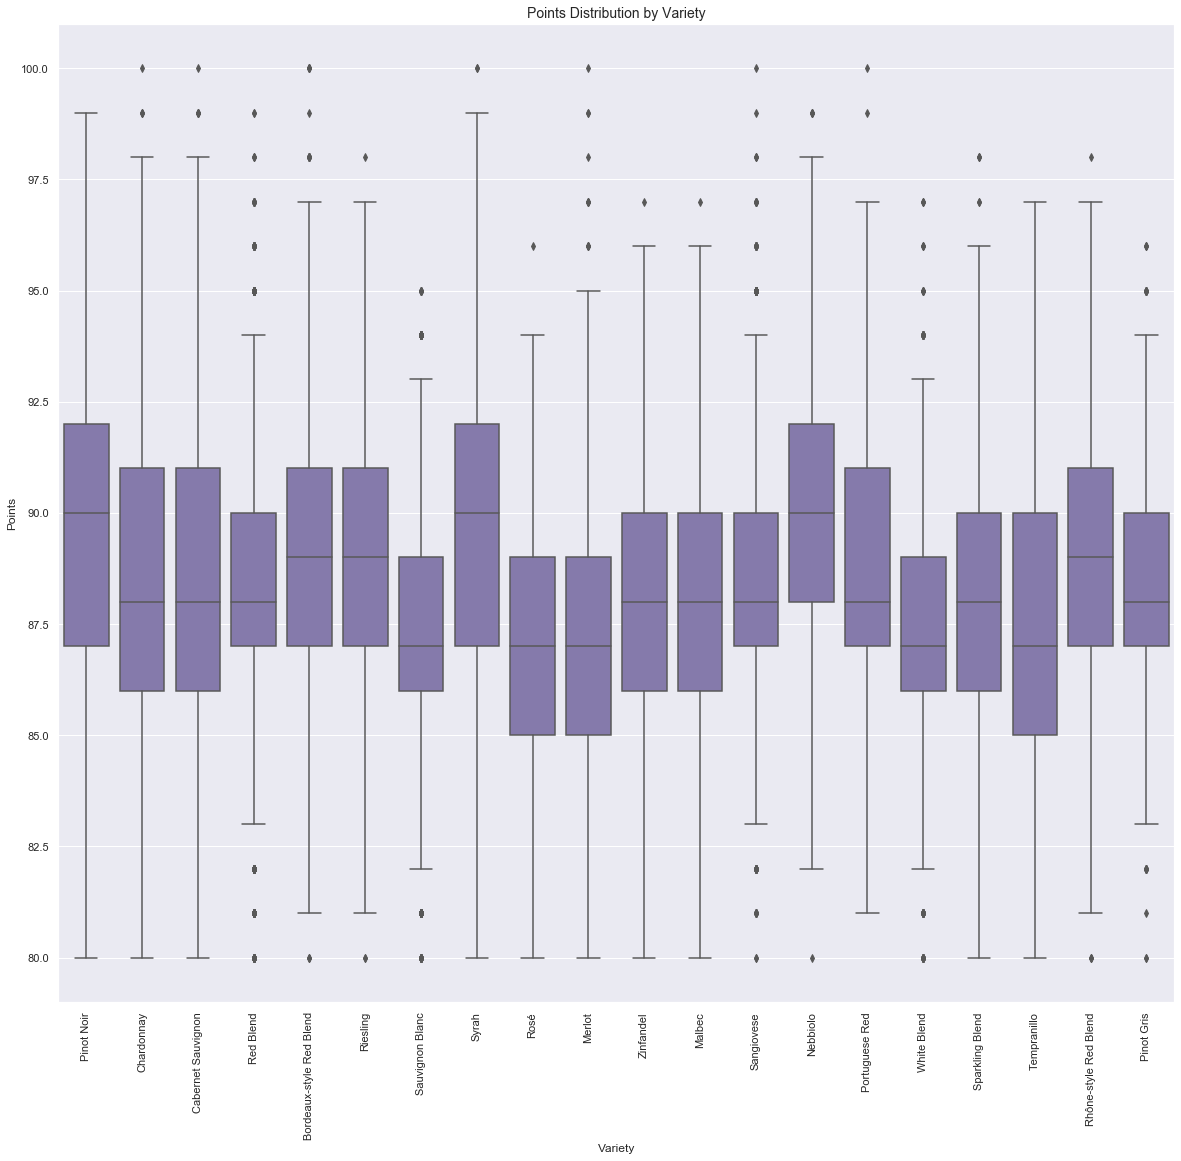

In [48]:
# boxplot of the top 20 most frequent wines in dataset by points scored
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df1, x = 'variety', y = 'points', color = base_color, order = df1.variety.value_counts().iloc[:20].index)
plt.title('Points Distribution by Variety', fontsize = 14)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90);

When plotting the top 20 most popular wines in the dataset we can see that pinor noir tends to perform the best with the highest average score.

### 4. Best Wine in Each Price Bracket?

We now know that quality is indeed related to price, but we can't all afford to splurge on a $3000 bottle of wine every week so let's find out how to get the best bang for your buck in each price range.

**Situation: Best wine for a quiet night in when there's nobody to impress and you just want a good enough bottle that doesn't break the bank.**    
**Price Range: Under $15**

In [49]:
cheap = df1[df1['price']<=15]

In [50]:
cheap.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
19136,Spain,"A spectacularly sweet and rich bruiser, and on...",94,14.0,Andalucia,Jerez,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Osborne,1827
23974,Portugal,Assobio is from a single vineyard in the Quint...,94,13.0,Douro,NaN,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,Quinta dos Murças,2011
12255,South Africa,This big boy greets us with his deep ruby/blac...,93,15.0,Stellenbosch,NaN,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon,Simonsig,1998
129572,France,It's hard to believe it's possible to buy this...,93,15.0,Rhône Valley,Tavel,Domaine des Carteresses 2016 Tavel,Rosé,Domaine des Carteresses,2016
37882,Australia,Writes the book on how to make a wine filled w...,93,15.0,Australia Other,South Eastern Australia,Marquis Philips 2000 Sarah's Blend Red (South ...,Red Blend,Marquis Philips,2000
74042,France,It's hard to believe it's possible to buy this...,93,15.0,Rhône Valley,Tavel,Domaine des Carteresses 2016 Tavel,Rosé,Domaine des Carteresses,2016
52776,US,Uvaggio is making a serious case for Lodi Verm...,93,14.0,California,Lodi,Uvaggio 2009 Vermentino (Lodi),Vermentino,Uvaggio,2009
43193,US,"This is a very sweet, unctuous dessert wine, w...",93,14.0,California,Russian River Valley,Novy 2006 Oley Dessert Wine Viognier (Russian ...,Viognier,Novy,2006
9609,France,"A rich, Port-like wine that is full and concen...",93,13.0,Southwest France,Cahors,Château Vincens 2011 Prestige Malbec-Merlot (C...,Malbec-Merlot,Château Vincens,2011
59823,US,"This is a very sweet, unctuous dessert wine, w...",93,14.0,California,Russian River Valley,Novy 2006 Oley Dessert Wine Viognier (Russian ...,Viognier,Novy,2006


For this situation, you could bag yourself a 94 point wine for only $13 by opting for a nice Portugese Quinta dos Murças 2011 Assobio Red (Douro). 

**Situation: Best wine to take to a dinner party or to give as a gift. It needs to be nice but we don't like them THAT much**    
**Price Range: Between 15 and 30 dollars**

In [51]:
low_mid = df1.query("price > 15 and price <=30")
low_mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
54311,Austria,"This wines arrives on tiptoe, citrus-scented a...",96,28.0,Kamptal,NaN,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Riesling,Eichinger,2014
81902,US,This is as good as the best from California—te...,96,30.0,Washington,Columbia Valley (WA),Efeste 2009 Lola Chardonnay (Columbia Valley (...,Chardonnay,Efeste,2009
45992,France,"With its apricot and honeyed flavors, this is ...",96,28.0,Bordeaux,Sauternes,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,Château Filhot,2014
102489,US,Even if winemaker Jason Lett tripled the price...,96,27.0,Oregon,Dundee Hills,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,Chardonnay,The Eyrie Vineyards,2014
119658,Spain,One of the world's best PX wines is Solera 192...,96,30.0,Andalucia,Montilla-Moriles,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Pedro Ximénez,Alvear,1927
101580,US,"Superb fruit highlights this tight, sculpted S...",96,20.0,Washington,Columbia Valley (WA),Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,Rulo,2007
9901,France,A touch of lemon balm adds a breezy freshness ...,96,29.0,Alsace,Alsace,Domaines Schlumberger 2014 Saering Grand Cru R...,Riesling,Domaines Schlumberger,2014
40309,Italy,This stunning Chianti Classico has an intense ...,96,27.0,Tuscany,Chianti Classico,Isole e Olena 2010 Chianti Classico,Red Blend,Isole e Olena,2010
109845,US,"This ultra reserve, made in half bottles only,...",96,30.0,Oregon,Willamette Valley,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir,Sineann,2015
54253,US,"Spicy in aroma and mouthfeel, this is a wondro...",96,27.0,California,El Dorado,Donkey & Goat 2012 Grenache Noir Grenache (El ...,Grenache,Donkey & Goat,2012


There is a great selection of wines here if you are willing to spend a little more. The best value would be a $20 Syrah from the US scoring a whooping 96 points!

**Situation: Treat yourself and them to an reasonably expensive bottle**    
**Price Range: Between 30 and 50 dollars**

In [52]:
mid = df1.query("price > 30 and price <=50")
mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,title,variety,winery,year
118059,US,"Shows classic, full-throttle notes of tropical...",99,44.0,California,Sonoma Coast,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,Failla,2010
1560,US,"A stunning Pirouette—63% Cabernet Sauvignon, 2...",98,50.0,Washington,Columbia Valley (WA),Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend,Pirouette,2008
47432,US,This wine shows real first-growth quality in i...,97,50.0,California,Russian River Valley,Williams Selyem 2010 Allen Vineyard Chardonnay...,Chardonnay,Williams Selyem,2010
4504,US,"This wine is insanely good, from a dry-farmed,...",97,50.0,California,Russian River Valley,Limerick Lane 2013 Rocky Knoll Zinfandel (Russ...,Zinfandel,Limerick Lane,2013
114981,US,A seriously top of the heap California Syrah. ...,97,35.0,California,El Dorado,Donkey & Goat 2010 Fenaughty Vineyard Syrah (E...,Syrah,Donkey & Goat,2010
45986,France,"Powered by intense botrytis, this wine is opul...",97,45.0,Bordeaux,Barsac,Château Coutet 2014 Barsac,Bordeaux-style White Blend,Château Coutet,2014
125831,US,The cold and fog actually helped this Chardonn...,97,50.0,California,Green Valley,Dutton-Goldfield 2010 Dutton Ranch Rued Vineya...,Chardonnay,Dutton-Goldfield,2010
16524,Portugal,"This is a superb blend of aged tawny Ports, bl...",97,40.0,Port,NaN,Taylor Fladgate NV 325 Anniversary (Port),Port,Taylor Fladgate,325
128268,US,A monumental Cabernet that succeeds on every l...,97,50.0,California,Oak Knoll District,Trefethen 2005 Estate Cabernet Sauvignon (Oak ...,Cabernet Sauvignon,Trefethen,2005
89730,France,The heady aromatic scent of fresh tangerine pe...,97,50.0,Alsace,Alsace,René Muré 2015 Clos Saint Landelin Vorbourg Gr...,Riesling,René Muré,2015


If you like a Chardonnay and are in the mood to treat yourself and your dinner guests then you couldn't go far wrong with a wine scoring 99 points for only $44 dollars. 

**Situation: Wine is your life and money is no object**    
**Price Range: Above $50**

In [53]:
high = df1.query("price > 50")
high.sort_values(by='points', ascending=False)[:20]

,country,description,points,price,province,region_1,title,variety,winery,year
113929,US,In 2005 Charles Smith introduced three high-en...,100,80.0,Washington,Columbia Valley (WA),Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,2006
111755,France,This is the finest Cheval Blanc for many years...,100,1500.0,Bordeaux,Saint-Émilion,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc,2010
89728,France,This latest incarnation of the famous brand is...,100,250.0,Champagne,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer,2008
123545,US,Initially a rather subdued Frog; as if it has ...,100,80.0,Washington,Walla Walla Valley (WA),Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,2008
118058,US,This wine dazzles with perfection. Sourced fro...,100,450.0,California,Sonoma County,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité,2007
89729,France,This new release from a great vintage for Char...,100,617.0,Champagne,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,2006
45781,Italy,"This gorgeous, fragrant wine opens with classi...",100,550.0,Tuscany,Brunello di Montalcino,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi,2010
111753,France,"Almost black in color, this stunning wine is g...",100,1500.0,Bordeaux,Pauillac,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild,2010
111754,Italy,It takes only a few moments before you appreci...,100,270.0,Tuscany,Brunello di Montalcino,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri,2007
42197,Portugal,This is the latest release of what has long be...,100,450.0,Douro,NaN,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha,2008


For the not outrageous cost of $80 you can experience what 100 points tastes like by purchasing the Charles Smith 2006 Royal City Syrah. We'd take this anyday over the 3300 dollar bottle which scored 12 points less!

### What words are most used when describing wine​?

This tutorial https://www.datacamp.com/community/tutorials/wordcloud-python was used to create the below word cloud.

In [57]:
# source: https://www.datacamp.com/community/tutorials/wordcloud-python
text = df1.description[1]

In [58]:
# source: https://www.datacamp.com/community/tutorials/wordcloud-python
text = " ".join(review for review in df1.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 29653210 words in the combination of all review.


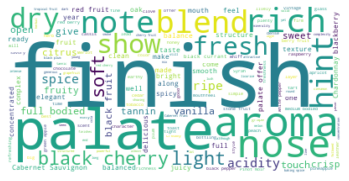

In [59]:
# source: https://www.datacamp.com/community/tutorials/wordcloud-python
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
# source: https://www.datacamp.com/community/tutorials/wordcloud-python
from PIL import Image
wine_mask = np.array(Image.open("wine_mask_xgk1tq.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [65]:
# source: https://www.datacamp.com/community/tutorials/wordcloud-python
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [66]:
# source: https://www.datacamp.com/community/tutorials/wordcloud-python
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

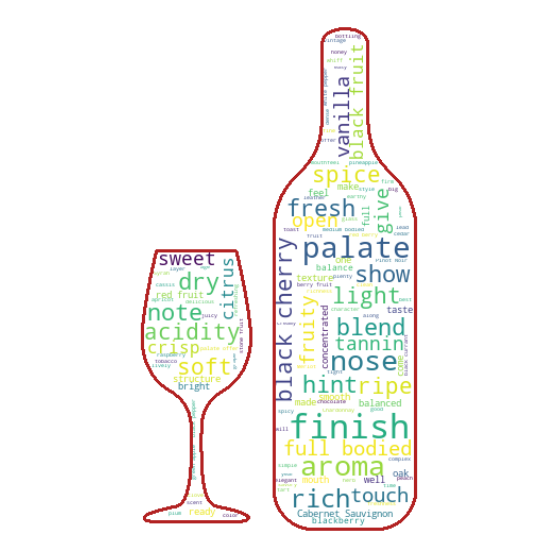

In [70]:
# source: https://www.datacamp.com/community/tutorials/wordcloud-python
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Communicate your Business Insights

The results of this analysis were written up in a Medium blog at https://medium.com/@stephanieirvine15/how-data-will-make-you-drink-wine-differently-c59d669831a1

<a id='conclusions'></a>
## Conclusions



 - England makes Superb wine, on average. But if you want a bottle with a perfect score of 100, you should look to the usual suspects: France, Italy, Portugal, the US, or Australia.
 - Price is related to quality. However, if you know where to look, you can bag a $4 wine that scores only 3 points below a 3300 dollar bottle.
 - All varieties of wine are fair game, but my bet's on the Pinot Noir. 
 - There is a perfect wine for every situation and every budget, with clear standout performers in each bracket. 
 - Certain words come up time and time again in wine reviews. Like any language, vinojargon can be learned.

Further work could involve sentiment analysis and other text related predictive models.

## Resources

https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv     
https://www.wine-searcher.com/critics-17-wine+enthusiast       
https://www.winemag.com    
https://stackoverflow.com/questions/37683558/pandas-extract-number-from-string      
https://towardsdatascience.com/beautify-coronavirus-bar-charts-ac636d314d98      
https://stackoverflow.com/questions/33005872/seaborn-regplot-partially-see-through-alpha     
http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot     
https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot    
https://www.datacamp.com/community/tutorials/wordcloud-python     
https://stackoverflow.com/questions/20443846/python-pil-nameerror-global-name-image-is-not-defined